# Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Membaca data dari file Excel
sales_data = pd.read_excel("C:\\Users\\ASUS\\OneDrive\\Ad astra\\Gelar Rasa\\sales.xlsx")

# Melihat data
display(sales_data)

# Menampilkan informasi dasar mengenai dataset (kolom, tipe data, nilai null, dll.)
sales_data.info()

,SalesID,CustomerID,SalesRepID,ProductID,Sales Quantity (in tons),Sales Amount (in US$),Year,Month,Day
0,210001,R012,BB1988,S2022,16,16000.0,2021,Jan,3
1,210002,R012,AA1986,S2022,18,18000.0,2021,Jan,3
2,210003,R078,CG1990,F3031,4,4000.0,2021,Jan,4
3,210004,R056,BF1988,F3030,1,1300.0,2021,Jan,6
4,210005,R078,CG1990,F3032,8,5600.0,2021,Jan,6
...,...,...,...,...,...,...,...,...,...
994,230376,R078,DH1985,S2020,1,3000.0,2023,Dec,15
995,230377,R078,CG1990,S2021,7,14000.0,2023,Dec,18
996,230378,R012,BB1988,S2022,22,22000.0,2023,Dec,19
997,230379,R012,BB1988,F3032,12,8400.0,2023,Dec,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   999 non-null    int64  
 1   CustomerID                999 non-null    object 
 2   SalesRepID                999 non-null    object 
 3   ProductID                 999 non-null    object 
 4   Sales Quantity (in tons)  999 non-null    int64  
 5   Sales Amount (in US$)     999 non-null    float64
 6   Year                      999 non-null    int64  
 7   Month                     999 non-null    object 
 8   Day                       999 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


Ki jelasno

In [13]:
# Menghitung Total Penjualan Tahunan untuk Setiap Produk
total_sales_per_product = sales_data.groupby(['Year', 'ProductID'])['Sales Amount (in US$)'].sum().reset_index() 
total_sales_per_product.index = pd.RangeIndex(start=1, stop=len(total_sales_per_product) + 1)
display(total_sales_per_product)

,Year,ProductID,Sales Amount (in US$)
1,2021,F3030,998400.0
2,2021,F3031,639000.0
3,2021,F3032,499800.0
4,2021,S2020,1965000.0
5,2021,S2021,1144000.0
6,2021,S2022,731000.0
7,2022,F3030,605800.0
8,2022,F3031,725000.0
9,2022,F3032,310800.0
10,2022,S2020,1458000.0


Jelasno

In [14]:
# Menghitung Rata-Rata Penjualan per Pelanggan
avg_sales_per_customer = sales_data.groupby('CustomerID')['Sales Amount (in US$)'].mean().reset_index()
avg_sales_per_customer.index = pd.RangeIndex(start=1, stop=len(avg_sales_per_customer) + 1)
display(avg_sales_per_customer)

,CustomerID,Sales Amount (in US$)
1,F034,26089.272031
2,R012,25196.265560
3,R056,8352.290076
4,R078,7541.276596


Jelasno

In [15]:
# Mengidentifikasi 3 Perwakilan Penjualan Teratas
total_sales_per_rep = sales_data.groupby('SalesRepID')['Sales Amount (in US$)'].sum().nlargest(3).reset_index()
total_sales_per_rep.index = pd.RangeIndex(start=1, stop=len(total_sales_per_rep) + 1)
display(total_sales_per_rep)

,SalesRepID,Sales Amount (in US$)
1,BC1984,3585400.0
2,AA1986,3522300.0
3,DD1988,3223900.0


# Bagian B - Deteksi Penipuan Kartu Kredit 

Studi kasus ini berfokus pada pembuatan model prediksi untuk mendeteksi transaksi penipuan kartu kredit. Kami akan melakukan analisis data, pemrosesan data, dan membangun model prediksi untuk membantu dalam mengidentifikasi transaksi yang mencurigakan.

Langkah-langkah yang akan dilakukan:
1. Pra-pemrosesan data.
2. Eksplorasi Data (EDA).
3. Membangun model prediksi.
4. Evaluasi dan interpretasi hasil.


## Pra-pemrosesan Data

Langkah pertama adalah memuat data dan melihat struktur dasarnya. Di sini kita meninjau kolom, tipe data, dan jumlah nilai yang hilang untuk setiap kolom.

In [16]:
# Membaca data dari file Excel
fraud_data = pd.read_excel("C:\\Users\\ASUS\\OneDrive\\Ad astra\\Gelar Rasa\\fraud.xlsx")

# Melihat data
display(fraud_data)

# Menampilkan informasi dasar mengenai dataset (kolom, tipe data, nilai null, dll.)
fraud_data.info()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",1956-01-09 00:00:00,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

## Exploratory Data Analysis (EDA)

Kami melakukan eksplorasi awal untuk melihat distribusi target variable `amt` dan korelasi antara variabel numerik lainnya. Ini akan membantu kita memahami hubungan potensial antara variabel independen dan jumlah tagihan kartu kredit.


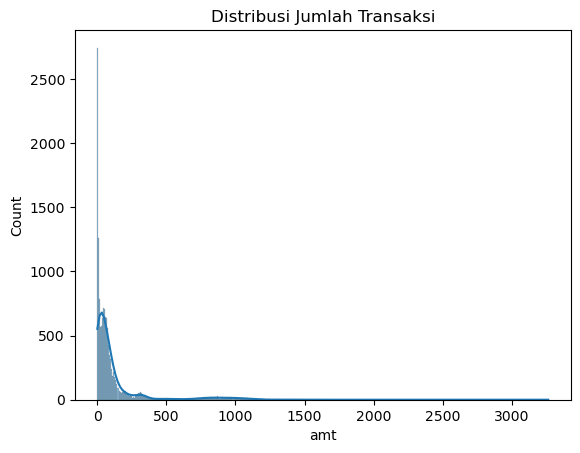

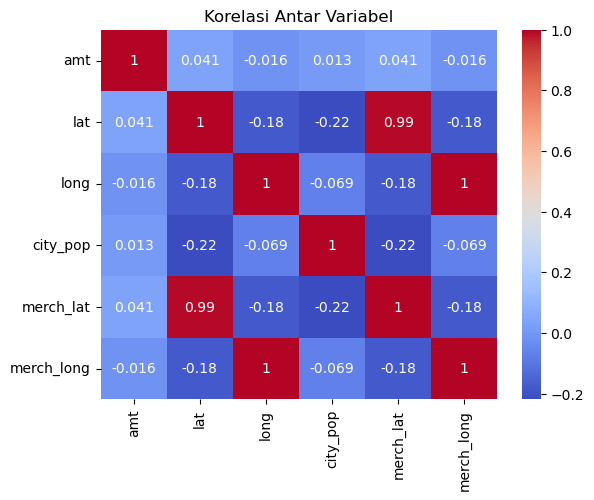

In [ ]:
# Distribusi kolom jumlah transaksi
plot_transaksi = sns.histplot(fraud_data['amt'], kde=True)
plt.title('Distribusi Jumlah Transaksi')
plt.show()

# Melihat korelasi antar variabel numerik
sns.heatmap(fraud_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

#### Menangani Outlier
Kita menggunakan metode *Interquartile Range* (IQR) untuk mengidentifikasi dan menghilangkan outlier dari variabel `amt`, guna mencegah bias dalam model prediksi

In [28]:
# Menangani outlier
Q1 = fraud_data['amt'].quantile(0.25)
Q3 = fraud_data['amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fraud_data = fraud_data[(fraud_data['amt'] >= lower_bound) & (fraud_data['amt'] <= upper_bound)]

### Pra-pemrosesan Data
- Menghapus kolom yang tidak relevan untuk prediksi `amt`, termasuk `is_fraud`, `trans_date_trans_time`, `dob`, dan `trans_num`.
- Melakukan One-Hot Encoding pada kolom kategori untuk membantu model memahami data non-numerik.

In [29]:
# Menghapus kolom yang tidak relevan
data = fraud_data.drop(columns=['amt', 'is_fraud', 'trans_date_trans_time', 'dob', 'trans_num'])

# One-Hot Encoding
data = pd.get_dummies(data, columns=['merchant', 'category', 'city', 'state', 'job'], drop_first=True)

In [30]:
# Menentukan X dan y
X = data
y = fraud_data['amt']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Membangun model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluasi model Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-Squared:", r2_lr)

Linear Regression - Mean Squared Error: 520.1467852140192
Linear Regression - R-Squared: 0.7837914048828061


In [32]:
# Membangun model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi model Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R-Squared:", r2_rf)

Random Forest Regressor - Mean Squared Error: 0.0015921595322326506
Random Forest Regressor - R-Squared: 0.9999993381895544


In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
# Memilih variabel untuk clustering
cluster_data = fraud_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]

# Standarisasi data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
fraud_data['cluster'] = kmeans.fit_predict(cluster_data_scaled)
